In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from sklearn import datasets
sess = tf.Session()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from netCDF4 import Dataset
rootgrp1 = Dataset("../data/cal_cams_gfas.nc", "r", format="NETCDF4")
frpfire = rootgrp1.variables["frpfire"]

In [4]:
rootgrp2 = Dataset("../data/cal_era5_2008.nc", "r", format="NETCDF4")
swvl1 = rootgrp2.variables["lai_lv"]

In [5]:
x_vals = np.array(swvl1[0:365][:][:])
y_vals = np.array(frpfire[0:365][:][:])
#x_vals = x_vals.reshape(-1)
#y_vals = y_vals.reshape(-1)
print(x_vals.shape)
print(y_vals.shape)
print(np.amin(x_vals))
print(np.amin(y_vals))
print(np.amax(x_vals))
print(np.amax(y_vals))
print(np.argwhere(np.isnan(x_vals)))
print(np.argwhere(np.isnan(y_vals)))

(365, 101, 101)
(365, 101, 101)
0.0
3.552713678800501e-15
2.96270751953125
30.09349274343672
[]
[]


In [6]:
learning_rate = 0.001
batch_size = 101*101
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [7]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [8]:
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [9]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [10]:
loss_vec = []
for i in range(365):
    #rand_index = np.random.choice(365)
    rand_index = i
    x1 = x_vals[rand_index][:][:].reshape(101*101,1)
    y  = y_vals[rand_index][:][:].reshape(101*101,1)
    sess.run(train_step, feed_dict={x_data: x1, y_target:y})
    temp_loss = sess.run(loss, feed_dict={x_data: x1, y_target: y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #25 A = [[-0.42765373]]b = [[0.43090457]]
Loss = 0.12129232
Step #50 A = [[-0.42036855]]b = [[0.42401108]]
Loss = 0.120217815
Step #75 A = [[-0.41246486]]b = [[0.41752625]]
Loss = 0.12029596
Step #100 A = [[-0.4043185]]b = [[0.41128802]]
Loss = 0.116128944
Step #125 A = [[-0.39640746]]b = [[0.4051135]]
Loss = 0.11106003
Step #150 A = [[-0.38887438]]b = [[0.39895022]]
Loss = 0.106642835
Step #175 A = [[-0.38144967]]b = [[0.3928897]]
Loss = 0.15494643
Step #200 A = [[-0.37387308]]b = [[0.38705477]]
Loss = 0.10471109
Step #225 A = [[-0.3668579]]b = [[0.38099986]]
Loss = 0.09645329
Step #250 A = [[-0.36039612]]b = [[0.374859]]
Loss = 0.092026085
Step #275 A = [[-0.35446203]]b = [[0.36861125]]
Loss = 0.089636184
Step #300 A = [[-0.34886318]]b = [[0.362353]]
Loss = 0.08391515
Step #325 A = [[-0.34365883]]b = [[0.35607028]]
Loss = 0.0795695
Step #350 A = [[-0.33866405]]b = [[0.34983206]]
Loss = 0.07710495


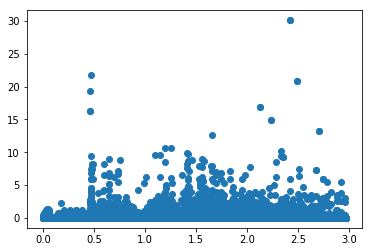

In [11]:
import matplotlib.pyplot as plt
#colors = np.random.rand(size)
x0 = x_vals.reshape(-1)
y0 = y_vals.reshape(-1)
plt.scatter(x0, y0)
plt.show()